<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
print("MODA:", boston_df['MEDV'].mode()[0])
print("MEDIANA:", boston_df['MEDV'].median())
print("MEDIA:", boston_df['MEDV'].mean())
print("MAXIMO:", boston_df['MEDV'].max())
print("MINIMO:", boston_df['MEDV'].min())

MODA: 50.0
MEDIANA: 21.2
MEDIA: 22.532806324110677
MAXIMO: 50.0
MINIMO: 5.0


## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

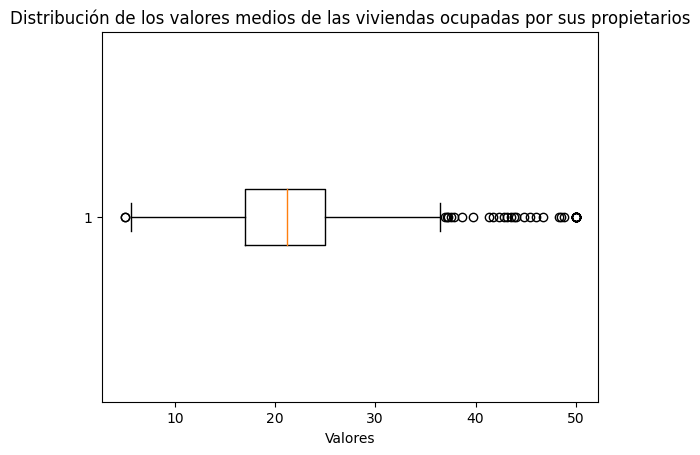

In [11]:
medv = boston_df['MEDV']
pyplot.boxplot(medv, vert=False)
pyplot.title("Distribución de los valores medios de las viviendas ocupadas por sus propietarios")
pyplot.xlabel("Valores")
pyplot.show()

There are many values out of the third quartile, which can harm the oprations

Provide a  bar plot for the Charles river variable


CHAS
0.0    471
1.0     35
Name: count, dtype: int64


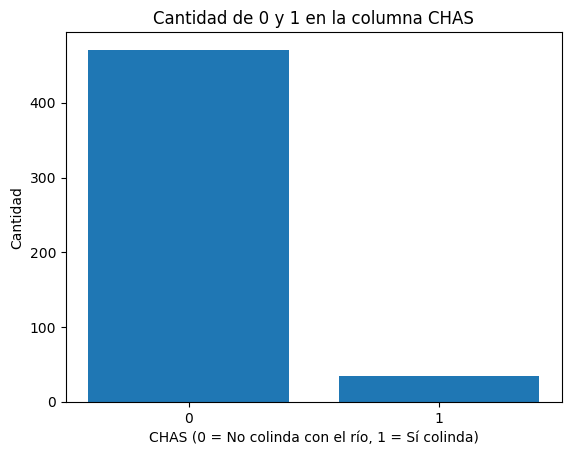

In [12]:
conteo = boston_df['CHAS'].value_counts().sort_index()  # Asegura que el 0 vaya antes que el 1

print(conteo)

pyplot.bar(conteo.index, conteo.values)

pyplot.xlabel('CHAS (0 = No colinda con el río, 1 = Sí colinda)')
pyplot.ylabel('Cantidad')
pyplot.title('Cantidad de 0 y 1 en la columna CHAS')
pyplot.xticks([0, 1])

pyplot.show()


We see a big difference between the values, where most of the houses do not border the river and only a very small part do.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


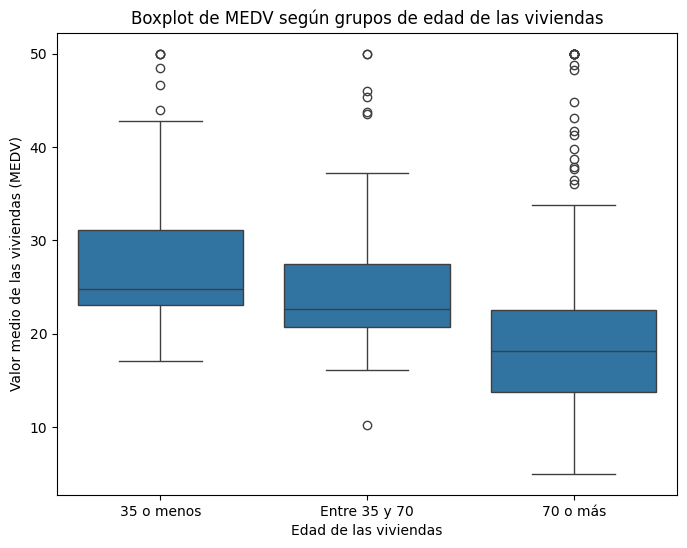

In [14]:
boston_df['AGE_CAT'] = pd.cut(boston_df['AGE'],
                       bins=[0, 35, 70, 100],
                       labels=['35 o menos', 'Entre 35 y 70', '70 o más'])

# Crear boxplot
pyplot.figure(figsize=(8,6))
sns.boxplot(x='AGE_CAT', y='MEDV', data=boston_df)
pyplot.xlabel('Edad de las viviendas')
pyplot.ylabel('Valor medio de las viviendas (MEDV)')
pyplot.title('Boxplot de MEDV según grupos de edad de las viviendas')
pyplot.show()

As we see, the older the house, the lower the value. We see a very similar amount between 35 or less and 70 or more, while between 35 and 70 there are fewer.

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


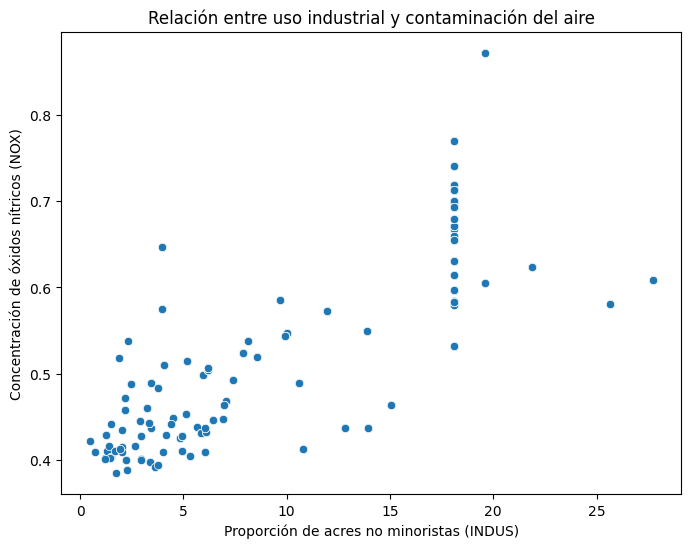

In [16]:
pyplot.figure(figsize=(8,6))
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
pyplot.xlabel('Proporción de acres no minoristas (INDUS)')
pyplot.ylabel('Concentración de óxidos nítricos (NOX)')
pyplot.title('Relación entre uso industrial y contaminación del aire')
pyplot.show()

The greater the proportion of industrial acres, the higher the concentration of NOx.

Create a histogram for the pupil to teacher ratio variable

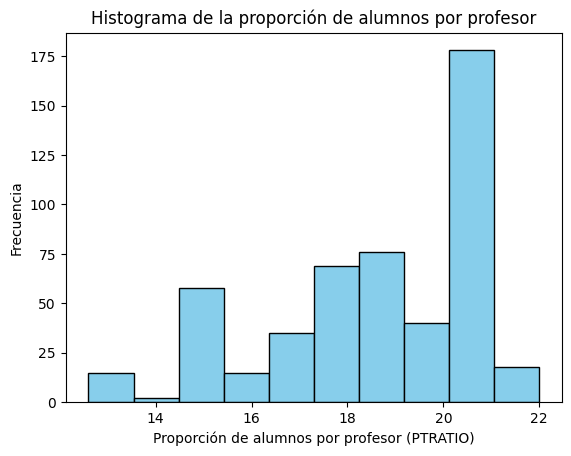

In [17]:
pyplot.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')
pyplot.xlabel('Proporción de alumnos por profesor (PTRATIO)')
pyplot.ylabel('Frecuencia')
pyplot.title('Histograma de la proporción de alumnos por profesor')
pyplot.show()


## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis (H₀) $H_0: \mu_1 = \mu_0$ : There is no significant difference in the mean value of houses located along the Charles River and those that are not.

Alternative hypothesis (H₁) $H_1: \mu_1 \ne \mu_0$ : There is a significant difference in the mean value of houses between the two areas.

In [20]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# Pvalue < 0.05

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False) 

# Pvalue < 0.05

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

We reject the null hypothesis, there is NO enough evidence in order to say there is a significant difference

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null hypothesis (H₀) $H_0: \mu_1 = \mu_2 = \mu_3$ : There is no significant difference in the mean house value between the different age groups.

Alternative hypothesis (H₁) $H_1: \mu_i$ : At least one group differs significantly in the mean house value.

In [23]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_CAT'] = '35 o menos'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_CAT'] = 'Entre 35 y 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_CAT'] = '70 o más'


scipy.stats.levene(boston_df[boston_df['AGE_CAT'] == '35 o menos']['MEDV'],
                   boston_df[boston_df['AGE_CAT'] == 'Entre 35 y 70']['MEDV'], 
                   boston_df[boston_df['AGE_CAT'] == '70 o más']['MEDV'], 
                   center='mean')

# Pvalue > 0.05

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [25]:
treinta_menos = boston_df[boston_df['AGE_CAT'] == '35 o menos']['MEDV']
trenta_setenta = boston_df[boston_df['AGE_CAT'] == 'Entre 35 y 70']['MEDV']
setenta_mas = boston_df[boston_df['AGE_CAT'] == '70 o más']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(treinta_menos, trenta_setenta, setenta_mas)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Pvalue < 0.05

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


We reject the null hypothesis, since there is significant evidence that at least one of the means differs.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis (H₀): There is no significant linear relationship between nitric oxide concentration and the proportion of non-retail acres per city.

Alternative hypothesis (H₁): There is a significant linear relationship between both variables.

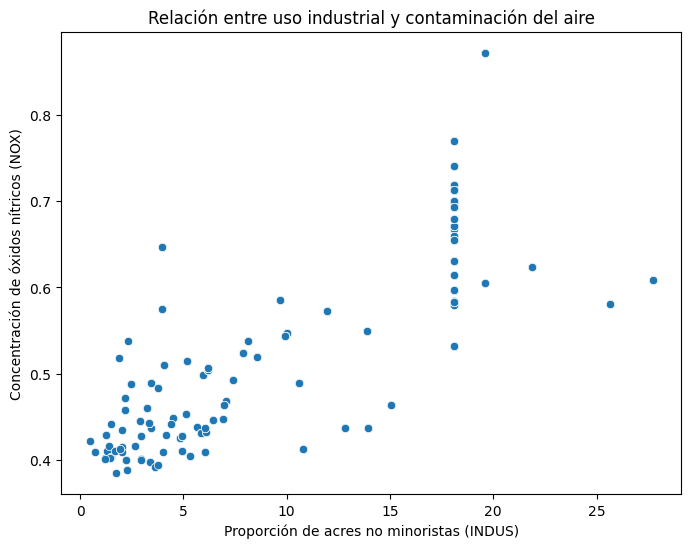

In [27]:
pyplot.figure(figsize=(8,6))
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
pyplot.xlabel('Proporción de acres no minoristas (INDUS)')
pyplot.ylabel('Concentración de óxidos nítricos (NOX)')
pyplot.title('Relación entre uso industrial y contaminación del aire')
pyplot.show()

In [29]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Pvalue < 0.05

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

We reject the null hypothesis, and conclude that there is a relationship

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Null hypothesis (H₀) $β₁ = 0$: There is no significant impact of distance (DIS) on the mean housing value (MEDV).

Alternative hypothesis (H₁) $β₁ ≠ 0$: There is a significant impact of distance on the mean housing value.

In [30]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# valorP < 0,05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        16:02:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Therefore, we reject the null hypothesis, as there is evidence that there is a difference in mean MEDV scores depending on DIS.

The coefficient 1.0916 means that for each additional unit of distance, the average home value increases by $1,091.60 (remembering that MEDV is in thousands of dollars).